In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
!wget https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/refs/heads/master/dataset.csv

--2024-11-05 17:14:06--  https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/refs/heads/master/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11024 (11K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  10.77K  --.-KB/s    in 0s      

2024-11-05 17:14:06 (78.2 MB/s) - ‘dataset.csv’ saved [11024/11024]



In [19]:
data = pd.read_csv("/content/dataset.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = data.iloc[:, :-1].values  # all rows, all columns except the last one
y = data.iloc[:, -1].values   # all rows, last column (target)

In [21]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [22]:
# Initialize parameters
def initialize_weights(dim):
    w = np.zeros(dim)
    b = 0
    return w, b

In [23]:
# Cost function and gradient calculation
def compute_cost_and_gradients(X, y, w, b):
    m = X.shape[0]
    Z = np.dot(X, w) + b
    A = sigmoid(Z)
    cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    dw = 1/m * np.dot(X.T, (A - y))
    db = 1/m * np.sum(A - y)
    return cost, dw, db

In [24]:
# Gradient descent function
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    cost_history = []  # Track cost for each iteration
    for i in range(num_iterations):
        cost, dw, db = compute_cost_and_gradients(X, y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
        if i % 100 == 0 or i == num_iterations - 1:
            cost_history.append(cost)
            print(f"Iteration {i}: Cost {cost:.4f}")
    return w, b, cost_history

In [25]:
# Predict function
def predict(X, w, b):
    Z = np.dot(X, w) + b
    A = sigmoid(Z)
    predictions = [1 if a > 0.5 else 0 for a in A]
    return np.array(predictions)

In [26]:
# Initialize weights
w, b = initialize_weights(X.shape[1])

In [28]:
# Train the model
learning_rate = 0.01
num_iterations = 2000
w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, num_iterations)

Iteration 0: Cost 0.3525
Iteration 100: Cost 0.3519
Iteration 200: Cost 0.3514
Iteration 300: Cost 0.3510
Iteration 400: Cost 0.3507
Iteration 500: Cost 0.3505
Iteration 600: Cost 0.3502
Iteration 700: Cost 0.3501
Iteration 800: Cost 0.3499
Iteration 900: Cost 0.3498
Iteration 1000: Cost 0.3497
Iteration 1100: Cost 0.3496
Iteration 1200: Cost 0.3495
Iteration 1300: Cost 0.3494
Iteration 1400: Cost 0.3494
Iteration 1500: Cost 0.3493
Iteration 1600: Cost 0.3493
Iteration 1700: Cost 0.3492
Iteration 1800: Cost 0.3492
Iteration 1900: Cost 0.3492
Iteration 1999: Cost 0.3491


In [29]:
# Make predictions
predictions = predict(X, w, b)

In [30]:
# Accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 85.15%


In [31]:
#ANALYSIS OF ACTUAL VS PREDICTED VALUES
# Create a DataFrame to display actual values, predicted values, and differences
# Convert actual and predicted values into DataFrames
results_df = pd.DataFrame({
    'Actual': y,
    'Predicted': predictions,
    'Difference': y - predictions
})

# Display the first few rows
print(results_df.head())

   Actual  Predicted  Difference
0       1          1           0
1       1          1           0
2       1          1           0
3       1          1           0
4       1          1           0


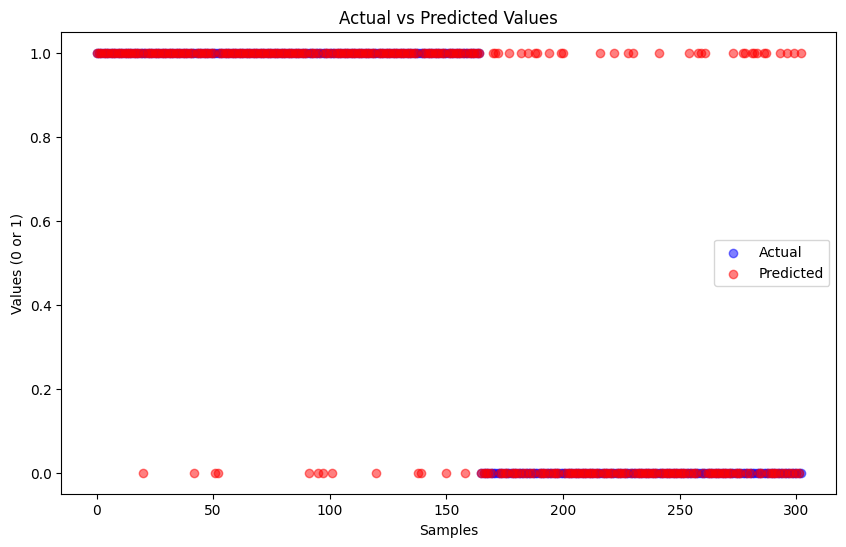

In [32]:
# Visualizing actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Values (0 or 1)')
plt.legend()
plt.show()